# Análise de Dados - Amazon Music
A análise abaixo foi feita com os dados da minha conta que solicitei no site da Amazon. O objetivo foi realizar uma análise exploratória de dados em um dataset próprio, como forma de exercício. 


## Obtenção dos Dados
Os dados utilizados foram obtidos a partir da minha conta da Amazon e solicitados em AGO/2021. Para essa análise irei utilizar o arquivo `listings.csv`.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("listening.csv")

## Entendendo os Dados


**Dicionário das variáveis principais**

* `timestamp` - data/horário
* `title` - nome da música
* `consumptionDurationMs` - Tempo escutado em milissegundos
* `trackLengthMs` - Duração da música em milissegundos
* `terminationReason` - Motivo do término
* `artistAsin` - Código que identifica o artista

In [ ]:
df.head()

,timestamp,title,asin,consumptionDurationMs,terminationReason,deviceType,musicTerritory,isShufflePlay,titleSetAsin,trackLengthMs,artistAsin,selectionSourceArtistAsin
0,2021-08-20 00:43:08 UTC,Snap Out Of It,B00MAZ7ZHY,193000,trackFinished,A16ZV8BU3SN1N3,BR,True,B077ZYL1PG,193000,B00122BV7Q,NaN
1,2021-08-20 00:39:52 UTC,The Jeweller's Hands,B073MSKP1Y,326000,userStop,A16ZV8BU3SN1N3,BR,True,B01N41L7CB,344000,B00122BV7Q,NaN
2,2021-08-20 00:34:24 UTC,Black Treacle,B073NQTD3P,8000,userStop,A16ZV8BU3SN1N3,BR,True,B01N65O4JE,217000,B00122BV7Q,NaN
3,2021-08-20 00:34:14 UTC,Potion Approaching,B073MR7CMT,212000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01NA6F8U5,212000,B00122BV7Q,NaN
4,2021-08-20 00:30:40 UTC,Teddy Picker,B073MNZNVW,165000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01LLY3XGG,165000,B00122BV7Q,NaN


Logo nessa primeira análise já podemos perceber uma predominância de valores ausentes (NaN) na coluna `selectionSourceArtistAsin`. Além disso, percebe-se que não temos o nome do artista, somente o seu Asin.

### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Em seguida, vamos identificar a quantidade de entradas que nosso conjunto de dados possui e os tipos de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos do dataset e se há dados ausentes
df.info()

Entradas:	 3382
Variáveis:	 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  3382 non-null   object
 1   title                      3382 non-null   object
 2   asin                       3382 non-null   object
 3   consumptionDurationMs      3382 non-null   int64 
 4   terminationReason          3382 non-null   object
 5   deviceType                 3382 non-null   object
 6   musicTerritory             3382 non-null   object
 7   isShufflePlay              3382 non-null   bool  
 8   titleSetAsin               3382 non-null   object
 9   trackLengthMs              3382 non-null   int64 
 10  artistAsin                 3382 non-null   object
 11  selectionSourceArtistAsin  188 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 294.1+ KB


#### Eliminando colunas que não serão utilizadas na análise

In [ ]:
# Eliminando as colunas
df.drop(['titleSetAsin', 'selectionSourceArtistAsin', 'asin'], axis=1, inplace=True) 

print("Entradas:\t {}".format(df.shape[0]))

Entradas:	 3382


#### Convertendo tipo Object em Datetime
Vamos converter `timestamp` para Datetime, um formato de data e hora que o Pandas consegue realizar cálculos, e de UTC para nosso fuso horário local.

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df.dtypes

timestamp                    datetime64[ns, UTC]
title                                     object
asin                                      object
consumptionDurationMs                      int64
terminationReason                         object
deviceType                                object
musicTerritory                            object
isShufflePlay                               bool
titleSetAsin                              object
trackLengthMs                              int64
artistAsin                                object
selectionSourceArtistAsin                 object
dtype: object

In [ ]:
# mudando a coluna timestamp para o índice do dataframe
df = df.set_index('timestamp')

# convertendo o fuso horário UTC
df.index = df.index.tz_convert('America/Sao_Paulo')

# redefinindo o indice para que timestamp vire coluna novamente
df = df.reset_index()

df.head()

,timestamp,title,asin,consumptionDurationMs,terminationReason,deviceType,musicTerritory,isShufflePlay,titleSetAsin,trackLengthMs,artistAsin,selectionSourceArtistAsin
0,2021-08-19 21:43:08-03:00,Snap Out Of It,B00MAZ7ZHY,193000,trackFinished,A16ZV8BU3SN1N3,BR,True,B077ZYL1PG,193000,B00122BV7Q,NaN
1,2021-08-19 21:39:52-03:00,The Jeweller's Hands,B073MSKP1Y,326000,userStop,A16ZV8BU3SN1N3,BR,True,B01N41L7CB,344000,B00122BV7Q,NaN
2,2021-08-19 21:34:24-03:00,Black Treacle,B073NQTD3P,8000,userStop,A16ZV8BU3SN1N3,BR,True,B01N65O4JE,217000,B00122BV7Q,NaN
3,2021-08-19 21:34:14-03:00,Potion Approaching,B073MR7CMT,212000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01NA6F8U5,212000,B00122BV7Q,NaN
4,2021-08-19 21:30:40-03:00,Teddy Picker,B073MNZNVW,165000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01LLY3XGG,165000,B00122BV7Q,NaN


#### Criando as colunas `hour` e  `weekday`

In [ ]:
# criando uma coluna com o dia da semana (Segunda=0, Domingo=6)
df['weekday'] = df['timestamp'].dt.weekday

# criando a coluna "hour" 
df['hour'] = df['timestamp'].dt.hour

df.head()

,timestamp,title,asin,consumptionDurationMs,terminationReason,deviceType,musicTerritory,isShufflePlay,titleSetAsin,trackLengthMs,artistAsin,selectionSourceArtistAsin,weekday,hour
0,2021-08-19 21:43:08-03:00,Snap Out Of It,B00MAZ7ZHY,193000,trackFinished,A16ZV8BU3SN1N3,BR,True,B077ZYL1PG,193000,B00122BV7Q,NaN,3,21
1,2021-08-19 21:39:52-03:00,The Jeweller's Hands,B073MSKP1Y,326000,userStop,A16ZV8BU3SN1N3,BR,True,B01N41L7CB,344000,B00122BV7Q,NaN,3,21
2,2021-08-19 21:34:24-03:00,Black Treacle,B073NQTD3P,8000,userStop,A16ZV8BU3SN1N3,BR,True,B01N65O4JE,217000,B00122BV7Q,NaN,3,21
3,2021-08-19 21:34:14-03:00,Potion Approaching,B073MR7CMT,212000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01NA6F8U5,212000,B00122BV7Q,NaN,3,21
4,2021-08-19 21:30:40-03:00,Teddy Picker,B073MNZNVW,165000,trackFinished,A16ZV8BU3SN1N3,BR,True,B01LLY3XGG,165000,B00122BV7Q,NaN,3,21


#### Transformando de miliseconds para minutes

In [ ]:
# De miliseconds para minutes - Coluna consumptionDurationMs
df.consumptionDurationMs = df.consumptionDurationMs.apply(lambda x:(x/(1000*60))%60)   
df.consumptionDurationMs = df.consumptionDurationMs.round(decimals=2)

# De miliseconds para minutes - Coluna trackLengthMs
df.trackLengthMs = df.trackLengthMs.apply(lambda x:(x/(1000*60))%60)  
df.trackLengthMs = df.trackLengthMs.round(decimals=2)

# Renomeando as colunas
df.rename(columns={'consumptionDurationMs':'consumptionDurationMin', 'trackLengthMs':'trackLengthMin'}, inplace=True)
df.head()

# Eliminando linhas consumptionDurationMs < 0.2 (12s)
df.drop(df[df.consumptionDurationMin < 0.2].index, axis=0, inplace=True)

print("Entradas:\t {}".format(df.shape[0]))

Entradas:	 2375


### Renomeando o artista na coluna `artistAsin`
Como dito anteriormente, não temos o nome do artista, apenas o seu código. Para facilitar a análise e a visualização dos dados, eu utilizei uma das funcionalidades da biblioteca Selenium (find_element_by_xpath) para encontrar o nome do artista na internet. 

Estou tentando melhorar o código, então não irei entrar em detalhes no momento de como fiz.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
navegador = webdriver.Chrome('chromedriver',options=options)
import time
...

In [ ]:
# Por fim, renomeando a coluna
df.rename(columns={'artistAsin':'artistName'}, inplace=True)

## Análise dos Dados


###**Q1.Verificando quanto tempo de audio foi escutado nesse periodo**

In [ ]:
inicio = df.timestamp.min().strftime('%d/%m/%Y')
fim = df.timestamp.max().strftime('%d/%m/%Y')

print("Foi escutado {} horas de músicas entre os dias {} e {}." .format
      (int(df.consumptionDurationMin.sum()/60), inicio, fim))


Foi escutado 103 horas de músicas entre os dias 13/08/2020 e 19/08/2021


In [ ]:
# agrupando dados por data e minutos escutados
minutosDia = df.groupby('timestamp')[['consumptionDurationMin']].sum()

# agrupando dados por dias e verificando a média de minutos escutados
mediaMinutosDia = minutosDia.resample('d').sum().round().mean()

# agrupando dados por dias e verificando o máximo de minutos
maximoMinutosDia = minutosDia.resample('d').sum().round().max()
print('A média diária de minutos escutados foi de {} min e o máximo de horas escutadas em um dia foi de {} horas.'
    .format(mediaMinutosDia[0].round(2), int(maximoMinutosDia[0]/60)))

A média diária de minutos escutados foi de 16.75 min e o máximo de horas escutadas em um dia foi de 6 horas


###**Q2.Quais os 10 artistas mais tocados e os mais ouvidos?**

In [ ]:
df.artistName.value_counts()[:10]

Arctic Monkeys          2135
Carla Bruni               53
Françoise Hardy           21
Dead Or Alive             19
Madeleine Peyroux         15
Sacha Distel              12
Pink Floyd                12
Keren Ann                 11
Bon Appétit Musique       11
Édith Piaf                11
Name: artistName, dtype: int64

In [ ]:
# artistas mais escutados (em minutos)
df.groupby(['artistName']).consumptionDurationMin.sum().sort_values(ascending=False)[:10] 

artistName
Arctic Monkeys          5700.47
Carla Bruni               74.40
Dead Or Alive             50.41
Pink Floyd                39.28
Françoise Hardy           32.98
Madeleine Peyroux         32.35
Bon Appétit Musique       30.89
The Beatles               29.01
Édith Piaf                26.89
Lana Del Rey              24.09
Name: consumptionDurationMin, dtype: float64

###**Q3.Quais as 10 músicas mais tocadas?**

In [ ]:
df.groupby(['title', 'artistName']).consumptionDurationMin.count().sort_values(ascending=False)[:10] 

title                                     artistName     
Too Much To Ask                           Arctic Monkeys     133
Crying Lightning                          Arctic Monkeys     114
Do Me a Favour                            Arctic Monkeys      94
Batphone                                  Arctic Monkeys      93
Piledriver Waltz                          Arctic Monkeys      74
Do I Wanna Know?                          Arctic Monkeys      72
Secret Door                               Arctic Monkeys      72
Fireside                                  Arctic Monkeys      70
Why'd You Only Call Me When You're High?  Arctic Monkeys      62
Fake Tales Of San Francisco               Arctic Monkeys      61
Name: consumptionDurationMin, dtype: int64

In [ ]:
# musicas mais escutadas (em minutos)
df.groupby(['title', 'artistName']).consumptionDurationMin.sum().sort_values(ascending=False)[:10] 

title                        artistName     
Crying Lightning             Arctic Monkeys     342.16
Batphone                     Arctic Monkeys     326.81
Too Much To Ask              Arctic Monkeys     272.27
Do Me a Favour               Arctic Monkeys     254.01
Do I Wanna Know?             Arctic Monkeys     234.17
Secret Door                  Arctic Monkeys     216.20
Star Treatment               Arctic Monkeys     189.46
Piledriver Waltz             Arctic Monkeys     179.60
Fireside                     Arctic Monkeys     177.44
Fake Tales Of San Francisco  Arctic Monkeys     158.21
Name: consumptionDurationMin, dtype: float64

In [ ]:
# as 10 músicas que eu mais escutei até o fim
df[df.consumptionDurationMin == df.trackLengthMin].groupby("title")['consumptionDurationMin'].count().sort_values(ascending=False)[:10]

title
Crying Lightning                            42
Why'd You Only Call Me When You're High?    33
Fake Tales Of San Francisco                 32
Do Me a Favour                              32
Potion Approaching                          29
Secret Door                                 27
My Propeller                                25
Piledriver Waltz                            24
R U Mine?                                   20
Too Much To Ask                             20
Name: consumptionDurationMin, dtype: int64

###**Q4.Quais as 10 músicas mais tocadas que não sejam da banda Arctic Monkeys?**

In [ ]:
new_df = df.drop(df[df.artistName == "Arctic Monkeys "].index, axis=0)

In [ ]:
new_df.groupby(['title', 'artistName']).consumptionDurationMin.count().sort_values(ascending=False)[:10] 

title                                        artistName          
Quelqu'un m'a dit                            Carla Bruni             38
Tous les garçons et les filles (Remastered)  Françoise Hardy         21
You Spin Me Round (Like a Record)            Dead Or Alive           19
J'ai Deux Amours                             Madeleine Peyroux       15
Le plus beau du quartier                     Carla Bruni             15
Wish You Were Here                           Pink Floyd              12
La belle vie                                 Sacha Distel            12
Jardin d'hiver                               Keren Ann               11
La Vie en rose                               Édith Piaf              11
Vous Qui Passez Sans Me Voir                 Bon Appétit Musique     11
Name: consumptionDurationMin, dtype: int64

In [ ]:
# musicas mais escutadas (em minutos)
new_df.groupby(['title', 'artistName']).consumptionDurationMin.sum().sort_values(ascending=False)[:10] 

title                                          artistName          
You Spin Me Round (Like a Record)              Dead Or Alive           50.41
Wish You Were Here                             Pink Floyd              39.28
Le plus beau du quartier                       Carla Bruni             37.86
Quelqu'un m'a dit                              Carla Bruni             36.54
Tous les garçons et les filles (Remastered)    Françoise Hardy         32.98
J'ai Deux Amours                               Madeleine Peyroux       32.35
Vous Qui Passez Sans Me Voir                   Bon Appétit Musique     30.89
I Want You (She's So Heavy) (Remastered 2009)  The Beatles             29.01
La Vie en rose                                 Édith Piaf              26.89
Acquainted [Explicit]                          The Weeknd              22.98
Name: consumptionDurationMin, dtype: float64

### Wordcloud com as músicas mais tocadas

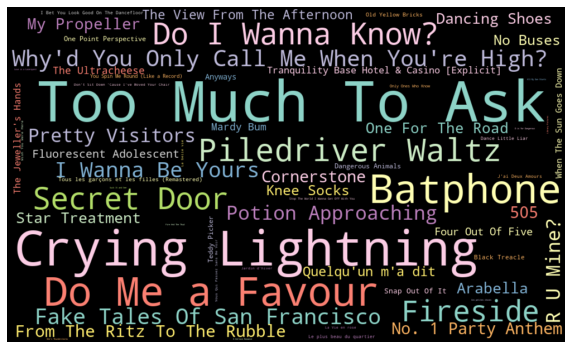

In [ ]:
fav_songs = df["title"].value_counts()

fig, ax = plt.subplots(figsize=(10,15))
wordcloud = WordCloud(width=1000, height=600, max_words=70, relative_scaling=1, colormap='Set3', normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

###**Q5. Em qual dia da semana eu escuto música com mais frequência?**

weekday
0    341
1    479
2    378
3    327
4    385
5    104
6    361
Name: timestamp, dtype: int64


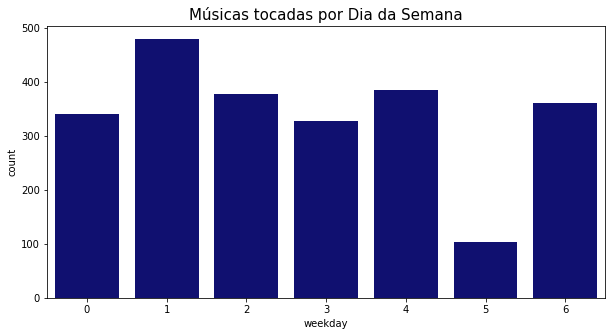

In [ ]:
print(df.groupby('weekday')['timestamp'].count())

# Monday=0, Sunday=6
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x=df['weekday'], ax=ax, color="navy")
ax.set_title('Músicas tocadas por Dia da Semana', fontsize=15);


###**Q6. Em que hora do dia eu escuto música com mais frequência?**

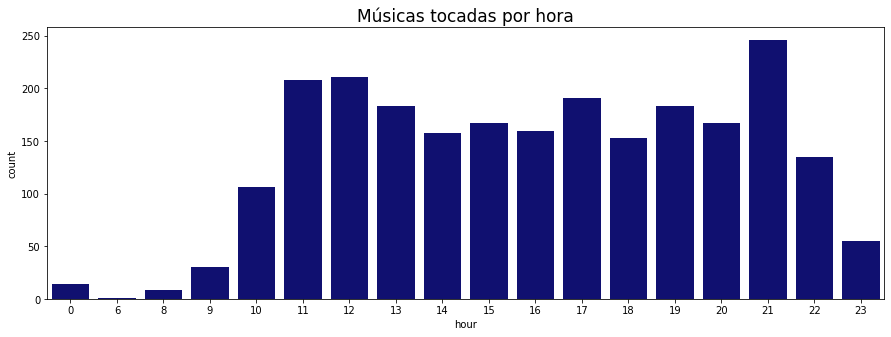

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x=df['hour'], ax=ax, color="navy")
ax.set_title('Músicas tocadas por hora', fontsize=17);

###**Q7. Em qual mês eu mais escutei música na Amazon?**

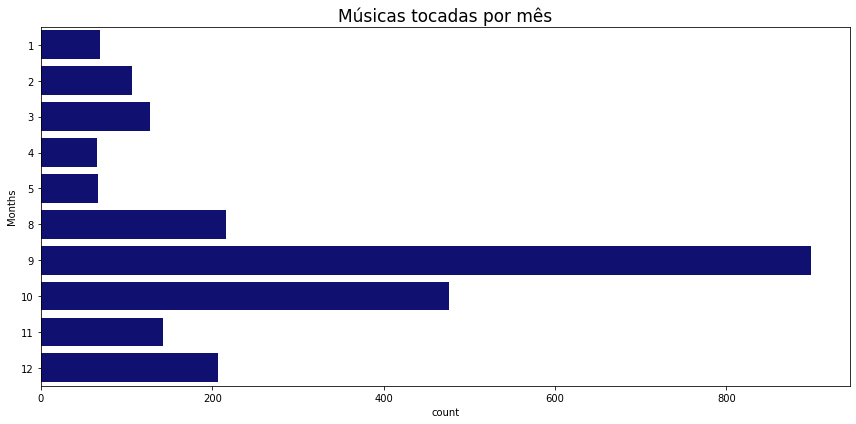

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df['timestamp'].dt.month, ax=ax, color="navy")
ax.set_title('Músicas tocadas por mês', fontsize=17);
ax.set_ylabel("Months")
plt.tight_layout()

### Heatmap: Uso ativo Horas x Dia da semana 

In [ ]:
usage = df.groupby(['hour', 'weekday'])['artistName'].size().reset_index()
usage_pivot = usage.pivot("hour", 'weekday', 'artistName') # .pivot(index, columns, values)
usage_pivot.head()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,NaN,NaN,NaN,NaN,13.0,NaN,1.0
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7.0,NaN,NaN,1.0,NaN,NaN
9,17.0,2.0,1.0,3.0,3.0,NaN,4.0
10,20.0,3.0,24.0,12.0,46.0,NaN,1.0


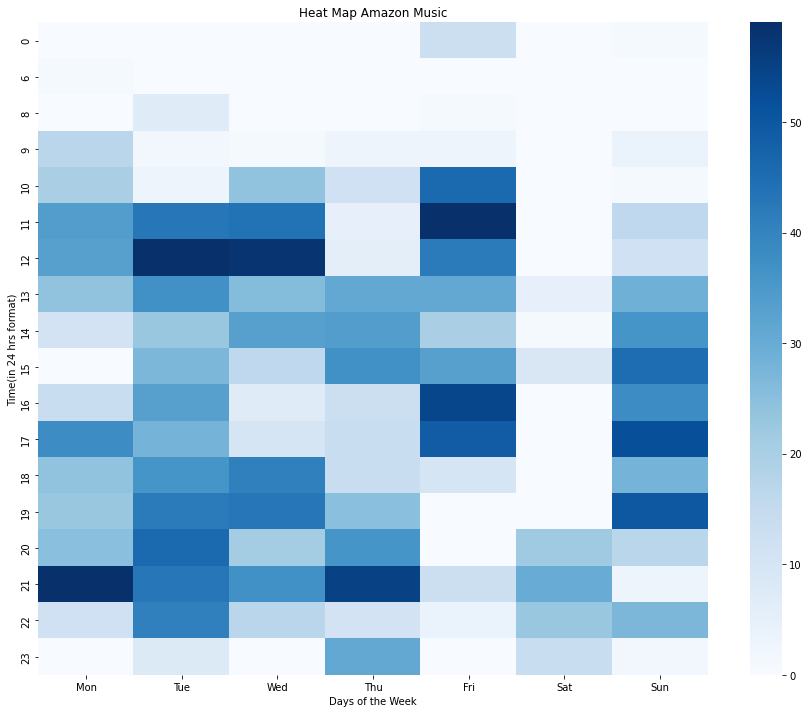

In [ ]:
days_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot.fillna(0), robust=True, cmap="Blues", ax = ax, xticklabels=days_name);
ax.set(title="Heat Map Amazon Music", xlabel="Days of the Week", ylabel="Time(in 24 hrs format)");